# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [1]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [2]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

# place your loading code here
dataset = list(lines)
dataset = np.array(dataset)

km = dataset[1:,0].astype(float)
year = dataset[1:,1].astype(float)
powerPS = dataset[1:,2].astype(float)
avgPrice = dataset[1:,3].astype(float)

print(km)

[125000. 150000.   5000. ...  20000.  10000.  20000.]


In [3]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')


Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




In [4]:
# linear regression with linregress (estimate price from year)

# your code
Price_Year = stats.linregress(year, avgPrice)
print(Price_Year.slope, Price_Year.intercept)


1509.0938253352238 -3018309.4849569635


In [62]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape

# your code
year_reshaped = year.reshape((-1,1))


Price_Year_SkL = linear_model.LinearRegression().fit(year_reshaped, avgPrice)
print(Price_Year_SkL.coef_, Price_Year_SkL.intercept_)

[1509.09382534] -3018309.4849569555


In [64]:
a = np.ones((3, 1), dtype = int)
#print(year_reshaped)
#print(a)
b = np.ones((1, 3), dtype = int)
#print(b)
#print(year)
year_reshaped = year.reshape((-1,1))
print(a@b)
print(year_reshaped@year)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1297 is different from 1)

In [41]:
# (Optional) perform linear regression with a manually implemented least squares (estimate price from year)
# You should get exactly the same solution of linregress !

# your code
#A = np.matmul(year_reshaped, year)
A = year_reshaped @ year
b = np.dot(avgPrice, year_reshaped)
year_reshaped

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1297 is different from 1)

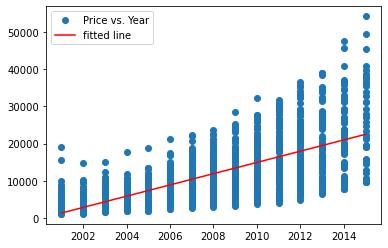

In [46]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

# your code

plt.plot(year, avgPrice, 'o', label='Price vs. Year')
plt.plot(year, Price_Year.intercept + Price_Year.slope*year, 'r', label='fitted line')
plt.legend()
plt.show()

90.33080718820231 -1303.912698987995


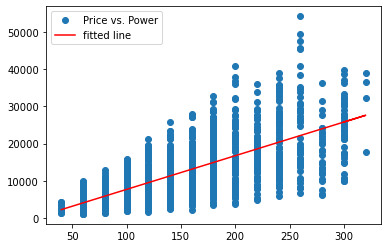

In [37]:
# linear regression with linregress (estimate price from power)

# your code.....
Price_Power = stats.linregress(powerPS, avgPrice)
print(Price_Power.slope, Price_Power.intercept)

plt.plot(powerPS, avgPrice, 'o', label='Price vs. Power')
plt.plot(powerPS, Price_Power.intercept + Price_Power.slope*powerPS, 'r', label='fitted line')
plt.legend()
plt.show()

-0.054251513309725635 16692.345302519738


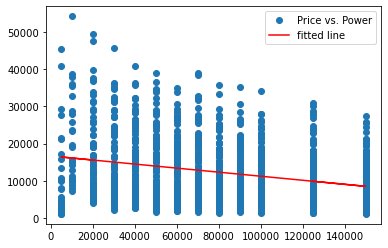

In [47]:
# linear regression with linregress (estimate price from km)

# your code...
Price_Distance = stats.linregress(km, avgPrice)
print(Price_Distance.slope, Price_Distance.intercept)

plt.plot(km, avgPrice, 'o', label='Price vs. Power')
plt.plot(km, Price_Distance.intercept + Price_Distance.slope*km, 'r', label='fitted line')
plt.legend()
plt.show()

In [48]:
# Have a look at the correlation coefficients to see which of the 3 features works better

# your code......
print(Price_Year.rvalue, Price_Power.rvalue, Price_Distance.rvalue)

0.6767043169095446 0.7085500315263968 -0.25728674299884974


In [ ]:
# (Optional) 2D linear regression with linear model (estimate price from year and power)


# your code......
